In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### 1. Reading and formatting datasets for plotting

In [2]:
targets = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly Targets')
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)

In [3]:
def format_outcomes(df):
    df.rename(columns={'Shorthand Name': 'SIB'}, inplace=True)
    df.drop(columns=['Contract', 'Area', 'Search Key', 'Area_Outcome'], inplace=True)
    return df

def parse_by_sib(df, sib):
    df = format_outcomes(df)
    sib_df = df[df['SIB'] == sib]
    for c in list(sib_df.columns.astype(str)):
        if 'Unnamed' in str(c):
            sib_df.drop(columns=[c], inplace=True)
    sib_df.set_index('Outcome', drop=True, inplace=True)
    sib_df = sib_df.T
    sib_df = sib_df.dropna(subset=['Referrals', 'Engagements'])
    sib_df = sib_df.iloc[1:, :]
    try:
        sib_df.rename(columns={'Job outcome 6-wk': 'Sustainments'}, inplace=True)
        sib_df.rename(columns={'Job outcome 13-wk': 'Sustainments'}, inplace=True)
    except:
        pass
    
    sib_df = sib_df[sib_df.index >= datetime.datetime(2019, 4, 1,0,0,0)]
    return sib_df

def format_targets(df, sib):
    new_cols = [x for x in df.columns if 'Unnamed' not in str(x)]
    df = df[new_cols]
    df = df[df['SIB'] == sib]
    df['Target'] = df['Target Type'] + ' ' + df['Outcome']
    df.set_index('Target', inplace=True)
    df = df.T.iloc[4:, :]
    df = df[df.index >= datetime.datetime(2019, 4, 1,0,0,0)]
    return df

def plot_by_sib(outcomes, targets, sib):
    outcomes_df = parse_by_sib(outcomes, sib)
    targets_df = format_targets(targets, sib)
    
    plot_df = outcomes_df.merge(targets_df, how='outer', left_on = outcomes_df.index, right_on = targets_df.index).sort_values('key_0')
    plot_df.set_index('key_0', inplace=True)
    
#     for x in plot_df.columns:
#         plot_df['Cumulative ' + x] = plot_df[x].cumsum()
    
    sns.set()
    for x in ['Referrals', 'Engagements', 'Job Starts', 'Sustainments']:
#         y_values = [y for y in plot_df.columns if x in y and 'Cumulative' in y]
        y_values = [y for y in plot_df.columns if x in y]
        x_values = plot_df.index
        fig = plt.figure(figsize=(10,5))
        for i,y in enumerate(y_values):
            if i ==0:
                plt.plot(x_values, plot_df[y_values[i]],color='g')
            elif i == 1:
                plt.plot(x_values, plot_df[y_values[i]], color='r', linestyle= '--')
            else:
                plt.plot(x_values, plot_df[y_values[i]], linestyle= '--')
            plt.ylabel(x)
            plt.legend(y_values)
    return

### 2. Plotting by SIB

#### 2.1 Camden

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


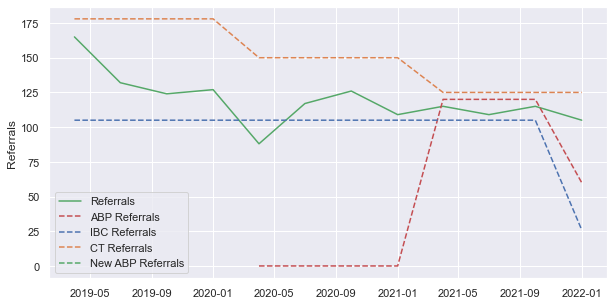

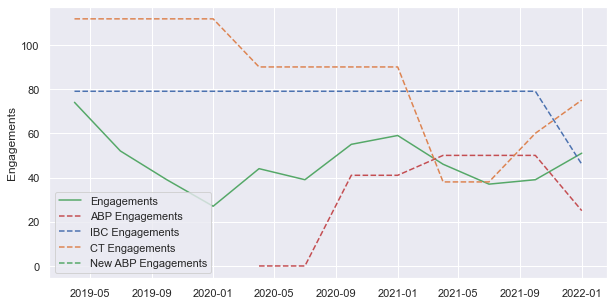

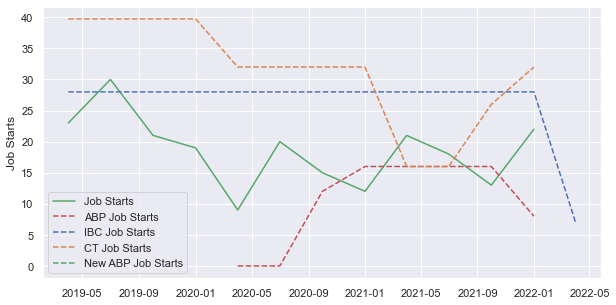

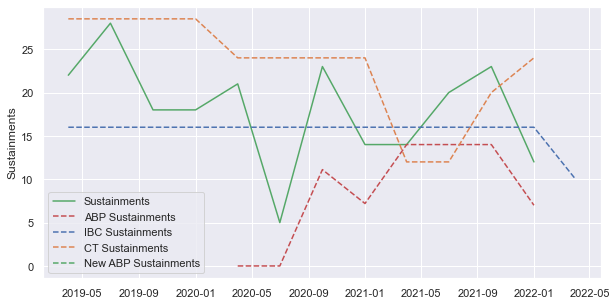

In [4]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'Camden')

#### 2.2 Enfield

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


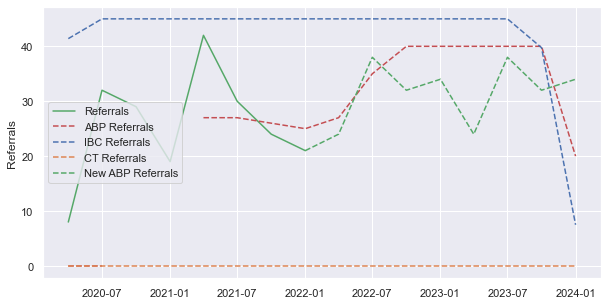

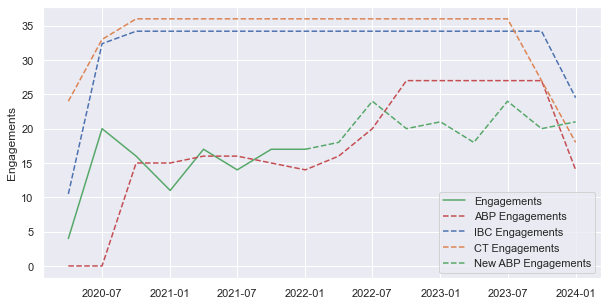

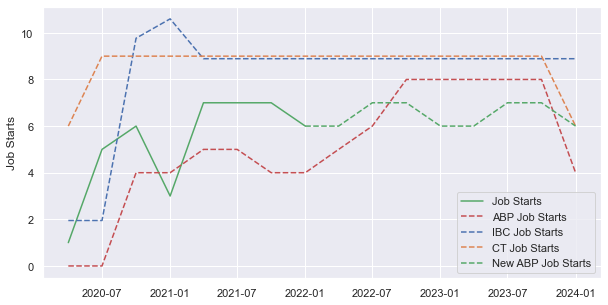

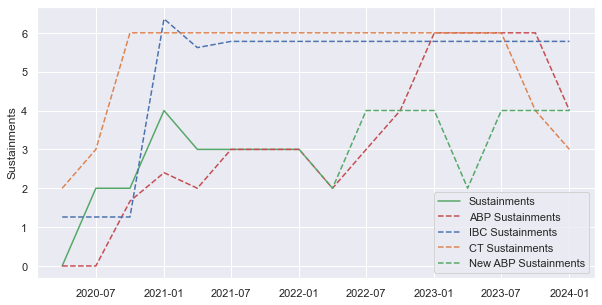

In [5]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'Enfield')

#### 2.3 H&B

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


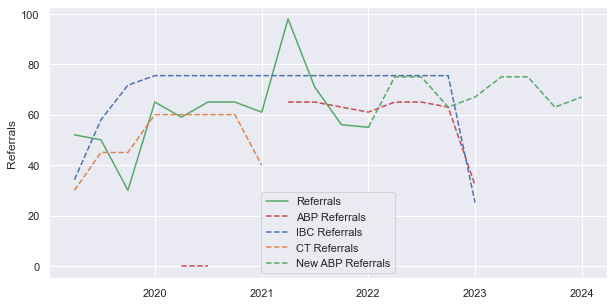

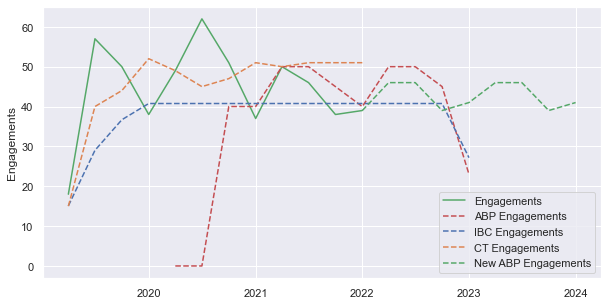

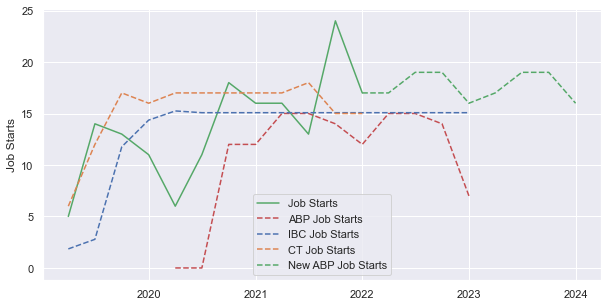

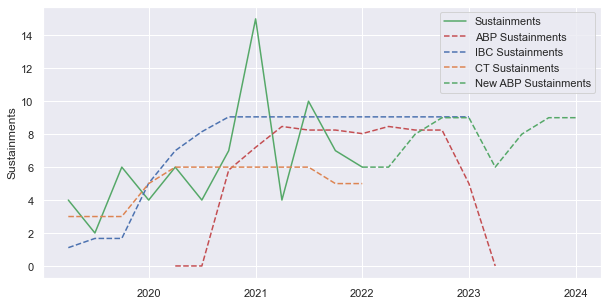

In [6]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'H&B')

#### 2.4 TH SMI

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


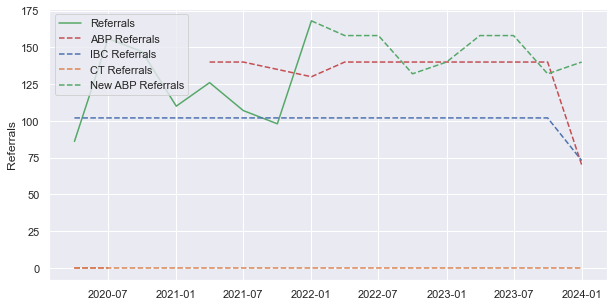

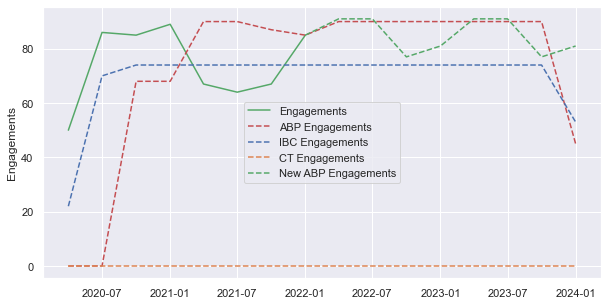

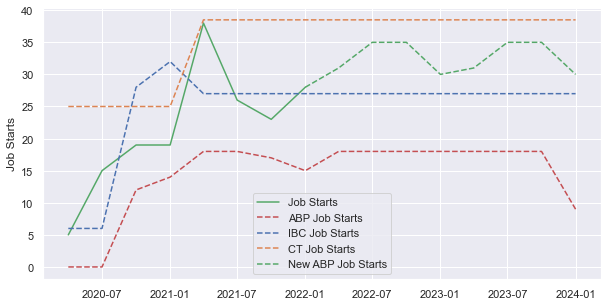

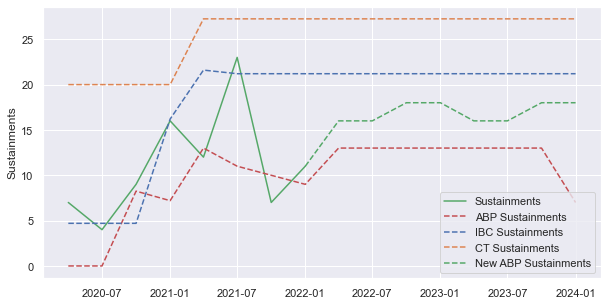

In [7]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'TH SMI')

#### 2.5 TH LD

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


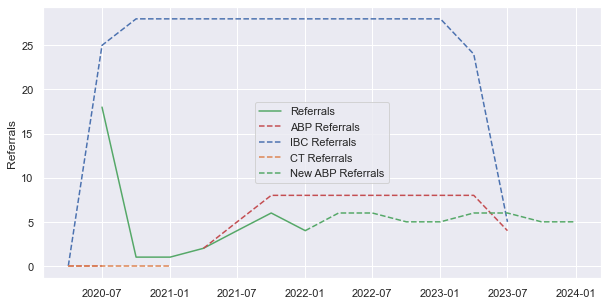

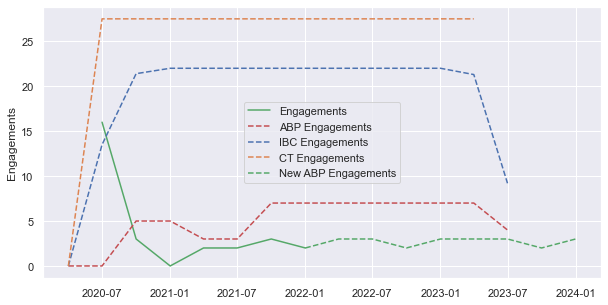

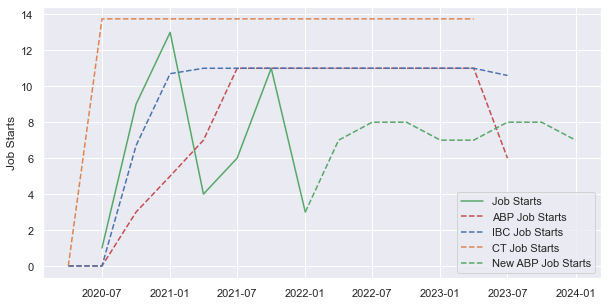

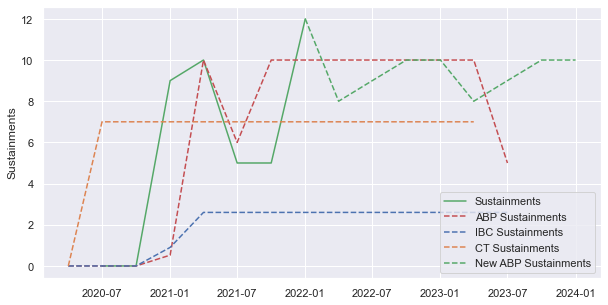

In [8]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'TH LD')

#### 2.6 WLA

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


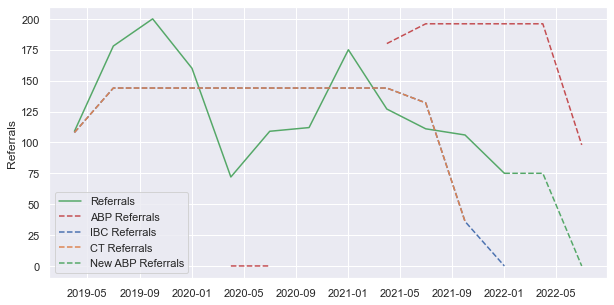

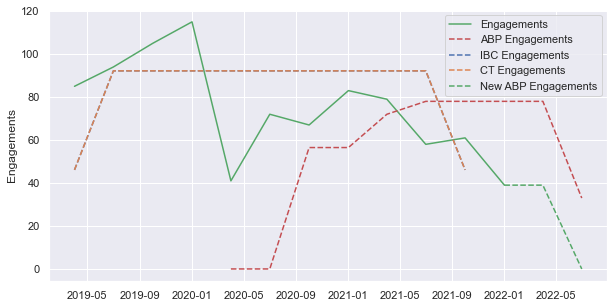

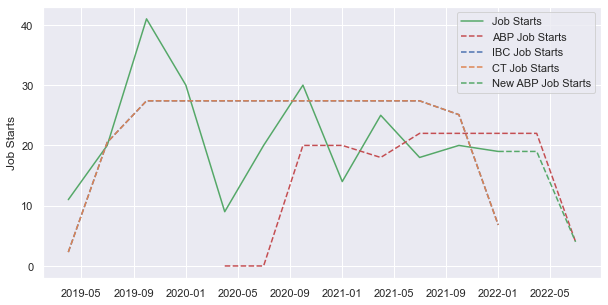

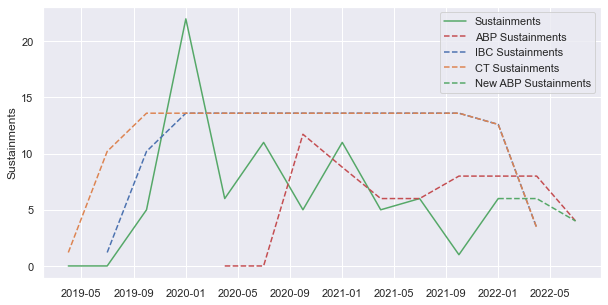

In [9]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'WLA')

#### 2.7 Shropshire

C:\Users\liam.thornton\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


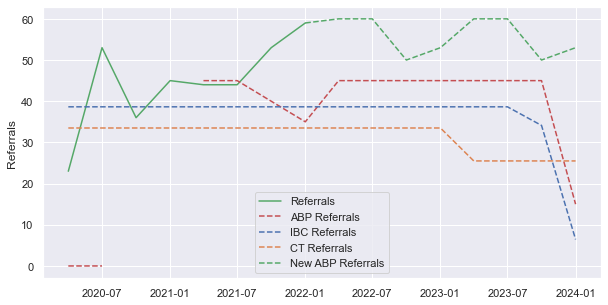

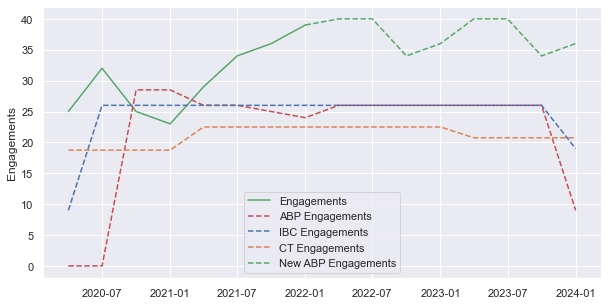

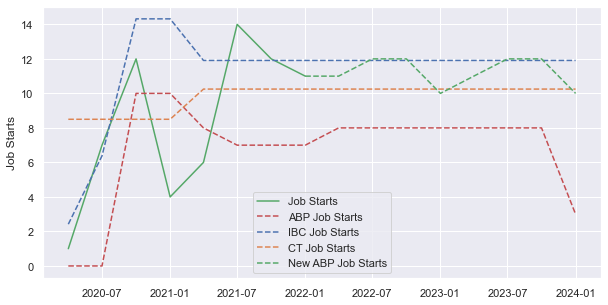

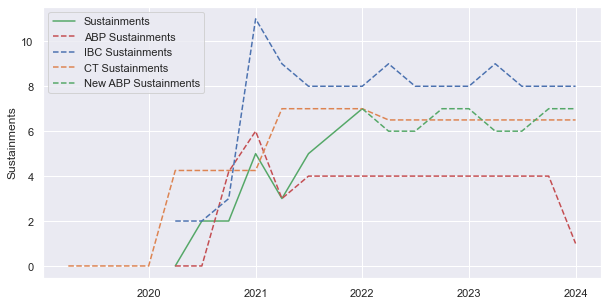

In [10]:
outcomes = pd.read_excel(os.path.join(os.getcwd(), 'MHEP Board Quarterly Overview.xlsx'), sheet_name='Quarterly outcomes summary', header=3)
plot_by_sib(outcomes, targets, 'Shropshire')